In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Cars93_miss.csv')

In [4]:
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,...,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make,Yrows,Xcols
0,Acura,Integra,Small,12.9,15.9,18.8,25.0,31.0,None,Front,...,102.0,68.0,37.0,26.5,NaN,2705.0,non-USA,Acura Integra,1,1
1,NaN,Legend,Midsize,29.2,33.9,38.7,18.0,25.0,Driver & Passenger,Front,...,115.0,71.0,38.0,30.0,15.0,3560.0,non-USA,Acura Legend,1,2
2,Audi,90,Compact,25.9,29.1,32.3,20.0,26.0,Driver only,Front,...,102.0,67.0,37.0,28.0,14.0,3375.0,non-USA,Audi 90,1,3
3,Audi,100,Midsize,NaN,37.7,44.6,19.0,26.0,Driver & Passenger,NaN,...,106.0,NaN,37.0,31.0,17.0,3405.0,non-USA,Audi 100,1,4
4,BMW,535i,Midsize,NaN,30.0,NaN,22.0,30.0,NaN,Rear,...,109.0,69.0,39.0,27.0,13.0,3640.0,non-USA,BMW 535i,1,5


In [5]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make', 'Yrows', 'Xcols'],
      dtype='object')

In [6]:
df.drop(['Model', 'Type',
       'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],axis=1,inplace=True)

In [7]:
df.head()

,Manufacturer,Min.Price,Price,Max.Price,Yrows,Xcols
0,Acura,12.9,15.9,18.8,1,1
1,NaN,29.2,33.9,38.7,1,2
2,Audi,25.9,29.1,32.3,1,3
3,Audi,NaN,37.7,44.6,1,4
4,BMW,NaN,30.0,NaN,1,5


In [8]:
manufacture=(np.asarray(df['Manufacturer'])).reshape(18,5)
mini=(np.asarray(df['Min.Price'])).reshape(18,5)
price=(np.asarray(df['Price'])).reshape(18,5)
maxi=(np.asarray(df['Max.Price'])).reshape(18,5)
print(manufacture)
print(mini)
print(price)
print(maxi)


[['Acura' nan 'Audi' 'Audi' 'BMW']
 ['Buick' 'Buick' 'Buick' 'Buick' 'Cadillac']
 ['Cadillac' 'Chevrolet' 'Chevrolet' 'Chevrolet' 'Chevrolet']
 ['Chevrolet' 'Chevrolet' 'Chevrolet' 'Chevrolet' nan]
 ['Chrysler' 'Chrysler' 'Dodge' 'Dodge' 'Dodge']
 ['Dodge' 'Dodge' 'Dodge' 'Eagle' 'Eagle']
 ['Ford' 'Ford' 'Ford' 'Ford' 'Ford']
 ['Ford' 'Ford' 'Ford' 'Geo' 'Geo']
 ['Honda' 'Honda' 'Honda' 'Hyundai' 'Hyundai']
 ['Hyundai' 'Hyundai' 'Infiniti' 'Lexus' nan]
 ['Lincoln' 'Lincoln' 'Mazda' 'Mazda' 'Mazda']
 ['Mazda' 'Mazda' 'Mercedes-Benz' 'Mercedes-Benz' 'Mercury']
 ['Mercury' 'Mitsubishi' 'Mitsubishi' 'Nissan' 'Nissan']
 ['Nissan' 'Nissan' 'Oldsmobile' 'Oldsmobile' 'Oldsmobile']
 ['Oldsmobile' 'Plymouth' 'Pontiac' 'Pontiac' 'Pontiac']
 ['Pontiac' 'Pontiac' 'Saab' 'Saturn' 'Subaru']
 ['Subaru' 'Subaru' 'Suzuki' 'Toyota' 'Toyota']
 ['Toyota' 'Toyota' 'Volkswagen' 'Volkswagen' 'Volkswagen']]
[[12.9 29.2 25.9  nan  nan]
 [14.2 19.9 22.6 26.3 33. ]
 [37.5  8.5 11.4 13.4 13.4]
 [14.7 14.7 18.  34.

In [9]:
result=df.pivot(index='Yrows',values='Price',columns='Xcols')

In [10]:
result

Xcols,1,2,3,4,5,6,7,8,9,10
Yrows,,,,,,,,,,
1,15.9,33.9,29.1,37.7,30.0,15.7,20.8,23.7,26.3,34.7
2,40.1,13.4,11.4,15.1,15.9,16.3,16.6,18.8,38.0,18.4
3,15.8,29.5,9.2,11.3,13.3,19.0,15.6,25.8,12.2,19.3
4,7.4,10.1,11.3,15.9,14.0,19.9,20.2,20.9,8.4,12.5
5,19.8,12.1,17.5,8.0,10.0,10.0,13.9,47.9,28.0,35.2
6,34.3,36.1,8.3,11.6,16.5,19.1,32.5,31.9,61.9,14.1
7,14.9,10.3,26.1,11.8,15.7,19.1,21.5,13.5,16.3,19.5
8,20.7,14.4,9.0,11.1,17.7,18.5,24.4,28.7,NaN,8.4
9,10.9,19.5,8.6,9.8,18.4,NaN,22.7,9.1,19.7,20.0


In [11]:
labels=(np.asarray(["{0}\n{1}\n{2}\n{3}".format(man,price,mini,maxi) 
                    for man,price,mini,maxi in zip(manufacture.flatten(),
                                                   price.flatten(),mini.flatten(),
                                                   maxi.flatten())])).reshape(9,10)

In [12]:
labels

array([['Acura\n15.9\n12.9\n18.8', 'nan\n33.9\n29.2\n38.7',
        'Audi\n29.1\n25.9\n32.3', 'Audi\n37.7\nnan\n44.6',
        'BMW\n30.0\nnan\nnan', 'Buick\n15.7\n14.2\n17.3',
        'Buick\n20.8\n19.9\nnan', 'Buick\n23.7\n22.6\n24.9',
        'Buick\n26.3\n26.3\n26.3', 'Cadillac\n34.7\n33.0\n36.3'],
       ['Cadillac\n40.1\n37.5\n42.7', 'Chevrolet\n13.4\n8.5\n18.3',
        'Chevrolet\n11.4\n11.4\n11.4', 'Chevrolet\n15.1\n13.4\n16.8',
        'Chevrolet\n15.9\n13.4\n18.4', 'Chevrolet\n16.3\n14.7\n18.0',
        'Chevrolet\n16.6\n14.7\n18.6', 'Chevrolet\n18.8\n18.0\n19.6',
        'Chevrolet\n38.0\n34.6\n41.5', 'nan\n18.4\n18.4\n18.4'],
       ['Chrysler\n15.8\n14.5\n17.1', 'Chrysler\n29.5\n29.5\n29.5',
        'Dodge\n9.2\n7.9\n10.6', 'Dodge\n11.3\n8.4\n14.2',
        'Dodge\n13.3\n11.9\n14.7', 'Dodge\n19.0\nnan\n24.4',
        'Dodge\n15.6\n14.8\n16.4', 'Dodge\n25.8\n18.5\n33.1',
        'Eagle\n12.2\n7.9\n16.5', 'Eagle\n19.3\nnan\n21.2'],
       ['Ford\n7.4\n6.9\n7.9', 'Ford\n10.1

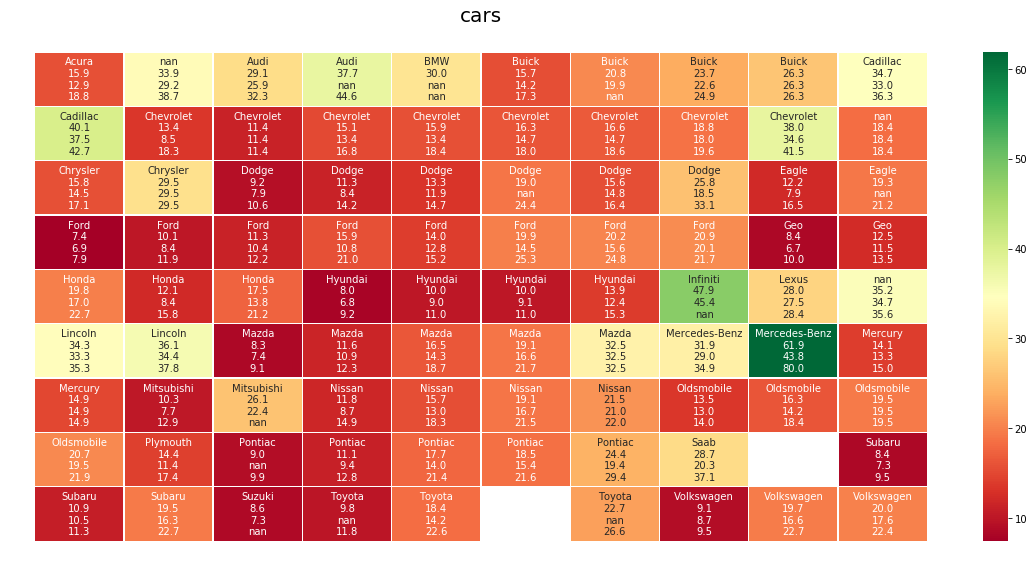

In [16]:
fig,ax=plt.subplots(figsize=(20,9))
title="cars"
plt.title(title,fontsize=20)
tt1=ax.title
tt1.set_position([0.5,1.05])
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')
sn.heatmap(result,annot=labels,fmt="",cmap='RdYlGn',linewidths=0.30,ax=ax)
plt.show()